## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

100%|██████████| 9.91M/9.91M [00:00<00:00, 123MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 43.1MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 96.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.63MB/s]


Text(0.5, 1.0, 'Image label: 1')

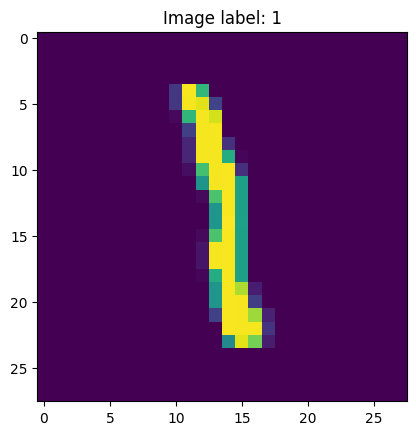

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [5]:
class Net(nn.Module):
  def __init__(self):
      super(Net, self).__init__()
      self.dp_three = nn.Dropout(0.2)
      self.dp_four = nn.Dropout(0.2)

      self.bn_one = nn.BatchNorm2d(1)
      self.conv1 = nn.Conv2d(1, 30, 3)
      self.bn_two = nn.BatchNorm2d(30)
      self.conv2 = nn.Conv2d(30, 60, 3)
      self.bn_three = nn.BatchNorm2d(60)
      self.conv3 = nn.Conv2d(60, 120, 3)
      self.bn_four = nn.BatchNorm2d(120)

      self.fc1 = nn.Linear(120, 80)
      self.fc2 = nn.Linear(80, 40)
      self.out = nn.Linear(40, 10)

  def forward(self, x):
    x = self.bn_one(x.view(x.size(0), 1, 28, 28))
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)

    x = self.bn_two(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)


    x = self.bn_three(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)

    x = self.bn_four(x)
    x = x.view(x.size(0), -1)
    x = self.dp_three(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dp_four(x)
    x = self.fc2(x)
    x= F.relu(x)
    return  self.out(x)

In [6]:
net = Net()
#print(net)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
from torchsummary import summary

summary(net.to(device), input_size=(28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm2d-1            [-1, 1, 28, 28]               2
            Conv2d-2           [-1, 30, 26, 26]             300
       BatchNorm2d-3           [-1, 30, 13, 13]              60
            Conv2d-4           [-1, 60, 11, 11]          16,260
       BatchNorm2d-5             [-1, 60, 5, 5]             120
            Conv2d-6            [-1, 120, 3, 3]          64,920
       BatchNorm2d-7            [-1, 120, 1, 1]             240
           Dropout-8                  [-1, 120]               0
            Linear-9                   [-1, 80]           9,680
          Dropout-10                   [-1, 80]               0
           Linear-11                   [-1, 40]           3,240
           Linear-12                   [-1, 10]             410
Total params: 95,232
Trainable params: 95,232
Non-trainable params: 0
---------------------------------

In [10]:
# Creating model instance
model = Net() # your code here

In [11]:
model.to(device)

Net(
  (dp_three): Dropout(p=0.2, inplace=False)
  (dp_four): Dropout(p=0.2, inplace=False)
  (bn_one): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1))
  (bn_two): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(30, 60, kernel_size=(3, 3), stride=(1, 1))
  (bn_three): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(60, 120, kernel_size=(3, 3), stride=(1, 1))
  (bn_four): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=120, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=10, bias=True)
)

Ниже доступны локальные тесты для проверки вашей модели:

In [12]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    #x = random_batch[0]
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [ ]:
# your code here

In [17]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [18]:
from tqdm import tqdm

In [ ]:
for epoch in tqdm(range(10)):
    model.train()
    for i, data in enumerate(train_data_loader, 0):
        inputs, labels = data[0].reshape(-1, 784), data[1]
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    loss_accumed = 0
    for batch in test_data_loader:
        output = model(batch[0].reshape(-1, 784))
        loss = criterion(output, batch[1])
        loss_accumed += loss
    print("Epoch {} valid_loss {}".format(epoch, loss_accumed))

print('Training is finished!')

 10%|█         | 1/10 [01:38<14:44, 98.33s/it]

Epoch 0 valid_loss 35.47028350830078


 20%|██        | 2/10 [03:17<13:11, 98.92s/it]

Epoch 1 valid_loss 38.30595397949219


 30%|███       | 3/10 [04:51<11:16, 96.64s/it]

Epoch 2 valid_loss 24.36804962158203


 40%|████      | 4/10 [06:24<09:31, 95.31s/it]

Epoch 3 valid_loss 24.463266372680664


 50%|█████     | 5/10 [07:58<07:52, 94.57s/it]

Epoch 4 valid_loss 26.24110984802246


 60%|██████    | 6/10 [09:33<06:18, 94.70s/it]

Epoch 5 valid_loss 25.397785186767578


 70%|███████   | 7/10 [11:06<04:42, 94.23s/it]

Epoch 6 valid_loss 24.213743209838867


 80%|████████  | 8/10 [12:47<03:13, 96.52s/it]

Epoch 7 valid_loss 18.717857360839844


 90%|█████████ | 9/10 [14:21<01:35, 95.58s/it]

Epoch 8 valid_loss 31.093189239501953


100%|██████████| 10/10 [15:54<00:00, 95.46s/it]

Epoch 9 valid_loss 24.318647384643555
Training is finished!


Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        #y_predicted = model(batch[0])
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.98638


In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        #y_predicted = model(batch[0])
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9839


Проверка, что пороги пройдены:

In [ ]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hw_mnist_data_dict.npy to hw_mnist_data_dict.npy


Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [ ]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            #y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


In [ ]:
from google.colab import files
files.download('submission_dict_mnist_task_1.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!